In [15]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [16]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg' , 'thalach' , 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [17]:
df = pd.read_csv('./heart+disease/processed.hungarian.data', header=None, names=column_names)
df.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


In [18]:
df.shape

(294, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [20]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?


In [21]:
#is data balanced in terms of count of each class?
df['num'].value_counts()

num
0    188
1    106
Name: count, dtype: int64

<Axes: xlabel='num'>

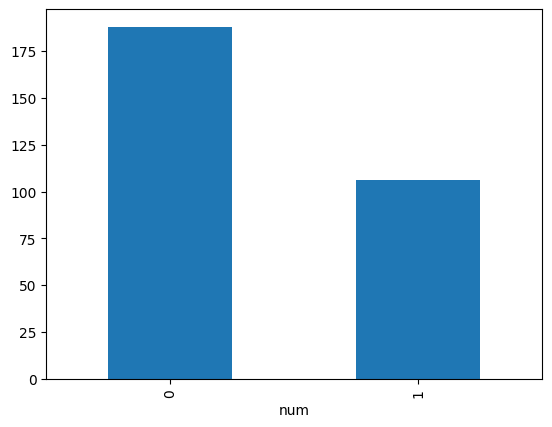

In [24]:
df['num'].value_counts().plot.bar()

abscene:  188
some_hearth_disease:  106


<BarContainer object of 2 artists>

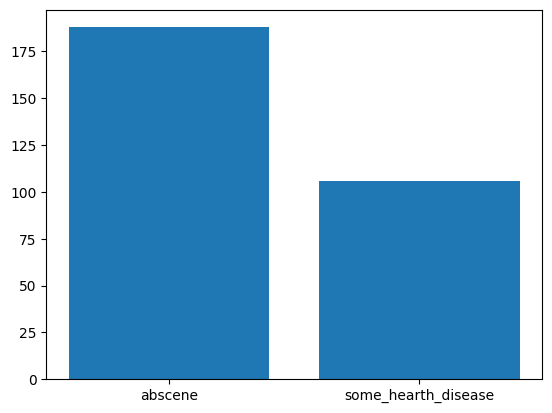

In [23]:

# count values with 0 and any other value
abscene = df['num'].value_counts()[0]
some_hearth_disease = df['num'].value_counts()[1:].sum()
print('abscene: ', abscene)
print('some_hearth_disease: ', some_hearth_disease)
# plot it
plt.bar(['abscene', 'some_hearth_disease'], [abscene, some_hearth_disease])



Jakie są średnie i odchylenia cech liczbowych?


In [25]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
#describe numeric features
df[numeric_features].describe()

,age,oldpeak
count,294.000000,294.000000
mean,47.826531,0.586054
std,7.811812,0.908648
min,28.000000,0.000000
25%,42.000000,0.000000
50%,49.000000,0.000000
75%,54.000000,1.000000
max,66.000000,5.000000


Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'oldpeak'}>]], dtype=object)

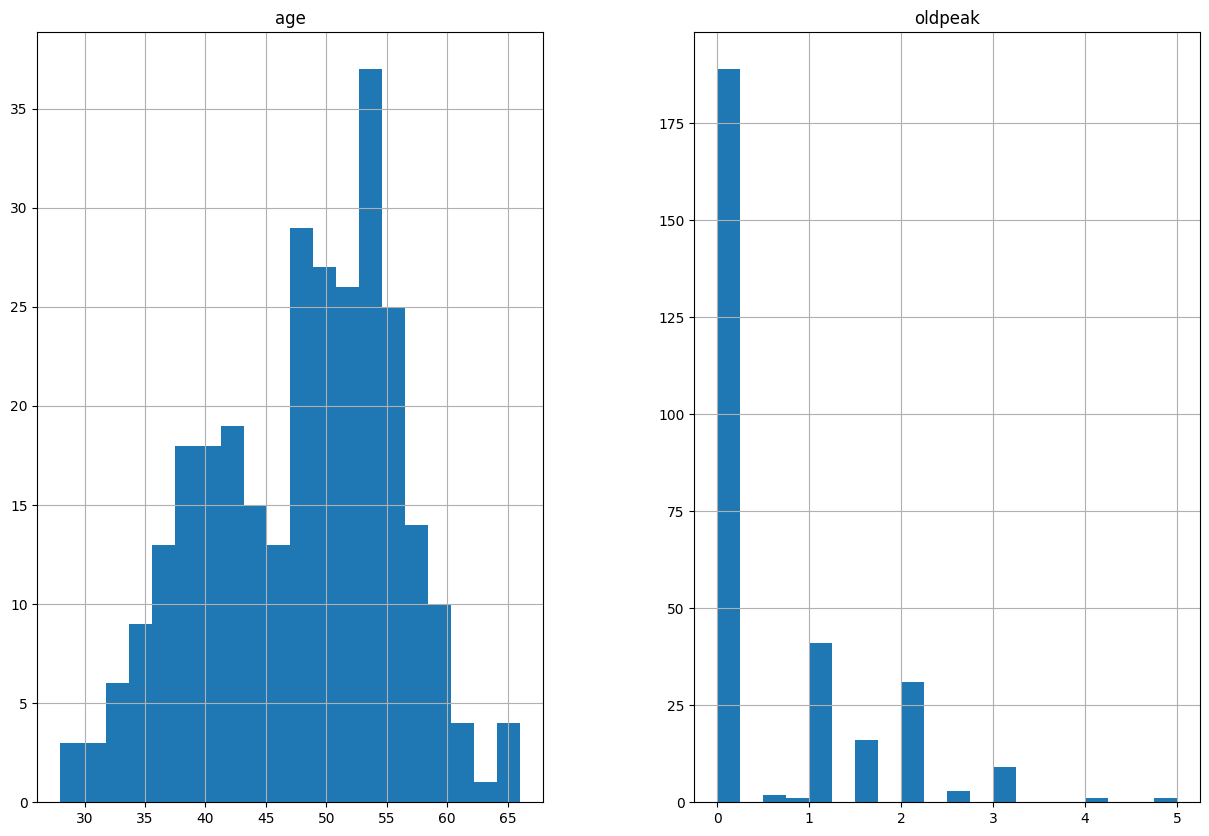

In [26]:
# is numeric features normal distribution?
df[numeric_features].hist(bins=20, figsize=(15, 10))

Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>]],
      dtype=object)

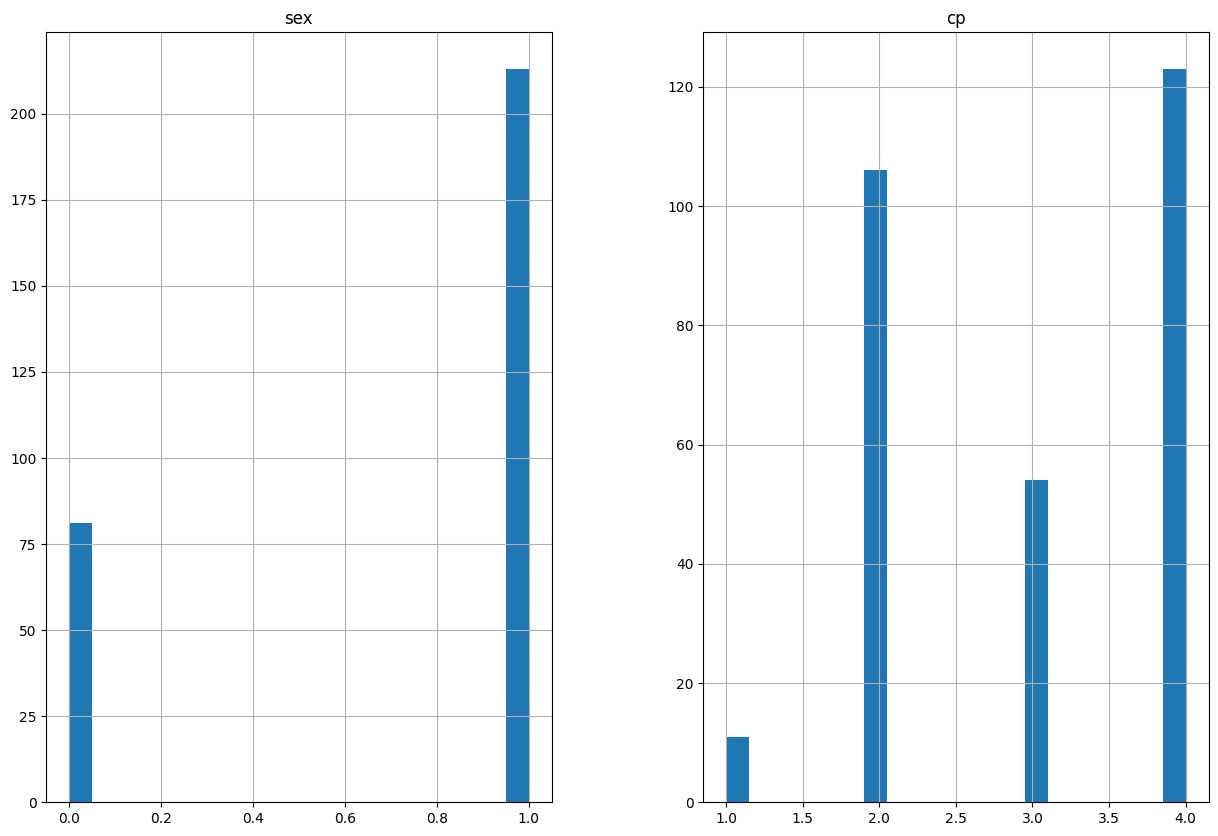

In [27]:
categories_features = ['sex', 'cp', 'fbs', 'restecg', 'exang']
# describe categories features
df[categories_features].describe()
#plot categories features
# TODO do poprawy
df[categories_features].hist(bins=20, figsize=(15, 10))

In [28]:
# plot categories features
df.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,0,4,120,254,0,1,110,0,0.0,?,?,?,0
96,48,0,4,150,227,0,0,130,1,1.0,2,?,?,0
97,48,1,2,100,?,0,0,100,0,0.0,?,?,?,0
98,48,1,2,130,245,0,0,160,0,0.0,?,?,?,0


Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je
zastąpić?

Usunięcie rekordów: Jeśli braki danych są sporadyczne i nie stanowią znaczącej części zbioru danych, można rozważyć usunięcie rekordów zawierających brakujące dane. Jednak jest to zwykle ostateczność i może prowadzić do utraty cennych informacji.

Uzupełnianie brakujących danych średnią/medianą: Możesz uzupełnić brakujące dane cech wartościami średnimi lub medianą z danej kolumny. Jest to przydatne, gdy dane są rozkładem normalnym lub nie zawierają wartości odstających.

Uzupełnianie brakujących danych za pomocą interpolacji: W przypadku danych szeregów czasowych lub przestrzennych, można użyć interpolacji, aby oszacować brakujące dane na podstawie dostępnych danych z pobliskich punktów czasowych lub przestrzennych.

Uzupełnianie brakujących danych za pomocą algorytmów uczenia maszynowego: Możesz również użyć modeli uczenia maszynowego, takich jak algorytmy regresji, drzewa decyzyjne, czy algorytmy bazujące na głębokim uczeniu do przewidywania brakujących danych na podstawie dostępnych danych i innych cech.

Uzupełnianie danych za pomocą technik imputacji: Istnieją zaawansowane techniki imputacji, takie jak imputacja MICE (Multiple Imputation by Chained Equations), K-nearest neighbors (K-NN imputation), czy imputacja za pomocą modeli generatywnych, które mogą być skuteczne w uzupełnianiu brakujących danych.

Używanie danych kategorycznych: Jeśli dane są kategoryczne, można przypisać brakujące wartości do kategorii "brak danych" lub użyć technik kodowania kategorycznego.

Dodawanie nowych cech: W niektórych przypadkach warto rozważyć dodanie nowych cech do zbioru danych, które mogą pomóc w modelowaniu brakujących danych.

Badanie przyczyn braków danych: Ważne jest również zrozumienie przyczyn braków danych i, jeśli to możliwe, podjęcie działań mających na celu ich minimalizację w przyszłości.


In [29]:
# how to relace all '?' in df to nan
df = df.replace('?', np.nan)
# check if there is any nan
df.isna().sum()

df.head(100) 


# df['num'].value_counts().plot.bar()

#df.['slope'] = df.['slope'].replace(1, 'upsloping');

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,0,4,120,254,0,1,110,0,0.0,NaN,NaN,NaN,0
96,48,0,4,150,227,0,0,130,1,1.0,2,NaN,NaN,0
97,48,1,2,100,NaN,0,0,100,0,0.0,NaN,NaN,NaN,0
98,48,1,2,130,245,0,0,160,0,0.0,NaN,NaN,NaN,0
